In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.filters.hp_filter import hpfilter
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/daily-website-visitors.csv",index_col=0,parse_dates=True)
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,,,,,,,
1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [ ]:
df.tail()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,,,,,,,
2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499
2167,Wednesday,4,8/19/2020,"2,064","1,564","1,297",267


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 1 to 2167
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                2167 non-null   object
 1   Day.Of.Week        2167 non-null   int64 
 2   Date               2167 non-null   object
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(1), object(6)
memory usage: 135.4+ KB


In [ ]:
# df['Page.Loads'] = df['Page.Loads'].astype(int)
# df['Unique.Visits'] = df['Unique.Visits'].astype(int)
# df['First.Time.Visits'] = df['First.Time.Visits'].astype(int)
# df['Returning.Visits'] = df['Returning.Visits'].astype(int)

In [ ]:
# List of Columns ti=o be converted from Object to Numeric(Int)
object_columns_to_convert = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits','Returning.Visits']

for col in object_columns_to_convert:
  df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce').astype(int)
  # Code to convert 56,000 -> 56000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 1 to 2167
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                2167 non-null   object
 1   Day.Of.Week        2167 non-null   int64 
 2   Date               2167 non-null   object
 3   Page.Loads         2167 non-null   int64 
 4   Unique.Visits      2167 non-null   int64 
 5   First.Time.Visits  2167 non-null   int64 
 6   Returning.Visits   2167 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 135.4+ KB


## PLOTTING  THE TRENDS AND CYCLES:

In [ ]:
# Converting the Date column to Date-time:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Checking the Changes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 1 to 2167
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Day                2167 non-null   object        
 1   Day.Of.Week        2167 non-null   int64         
 2   Date               2167 non-null   datetime64[ns]
 3   Page.Loads         2167 non-null   int64         
 4   Unique.Visits      2167 non-null   int64         
 5   First.Time.Visits  2167 non-null   int64         
 6   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 135.4+ KB


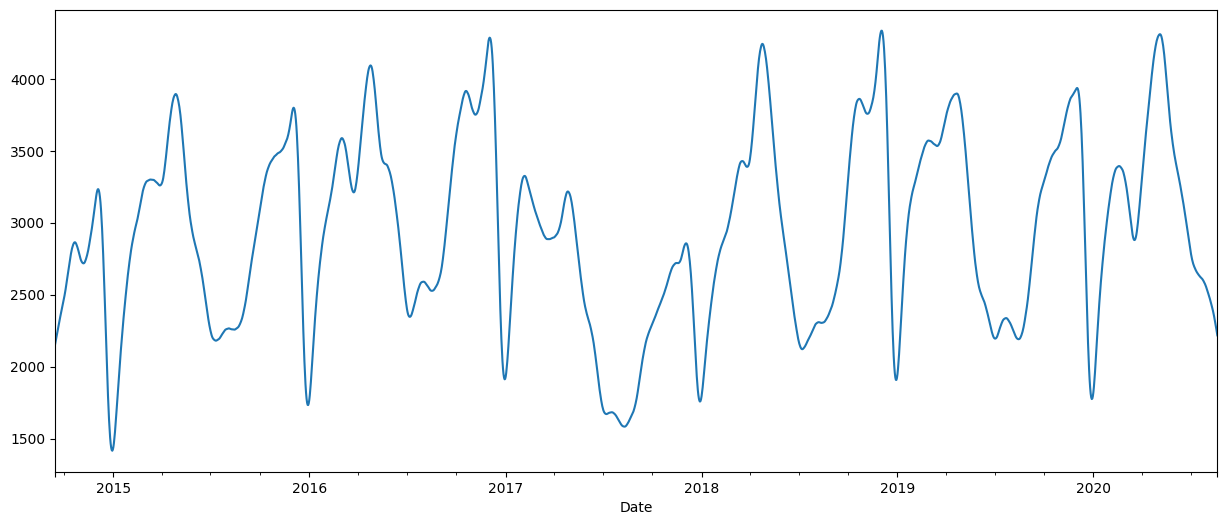

In [ ]:
df.set_index('Date',inplace=True)
cycle,trend = hpfilter(df['Unique.Visits'],lamb=1600)
trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

# As from the Graph it can be seen that There is no constannt Increasing or Decreasing Trend Overall

# But Between 2 years it can be Noticed that During the Start , End and Mid of the Year the No of Unique Visitors. on the Website are Comparitively less , Else they are more

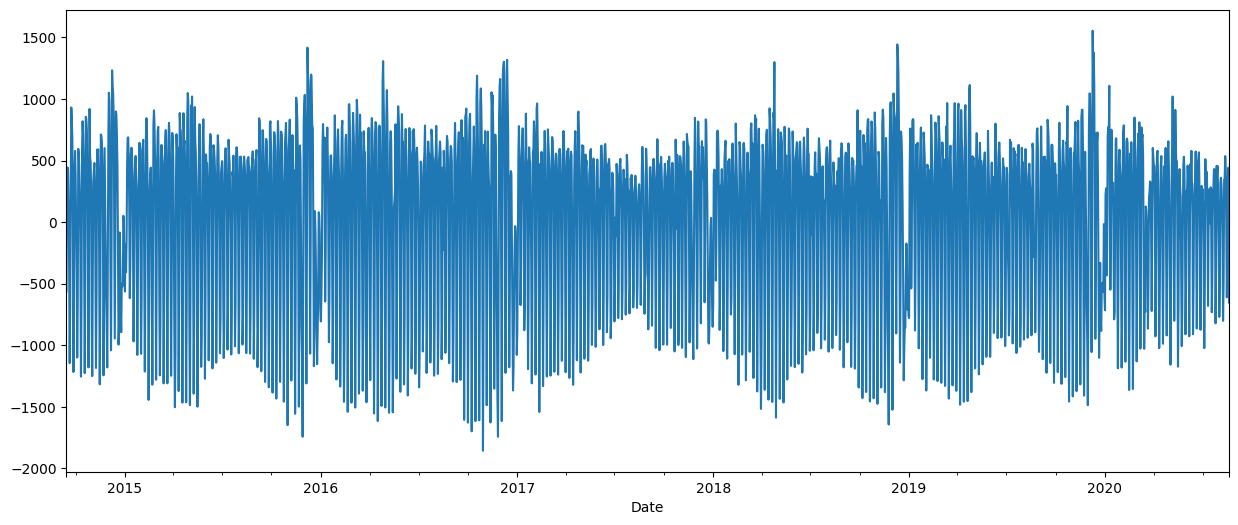

In [ ]:
cycle.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

# As we can see There is alternating periods of expansion and contraction and it's Following a similar pattern but with Different Magnitudes

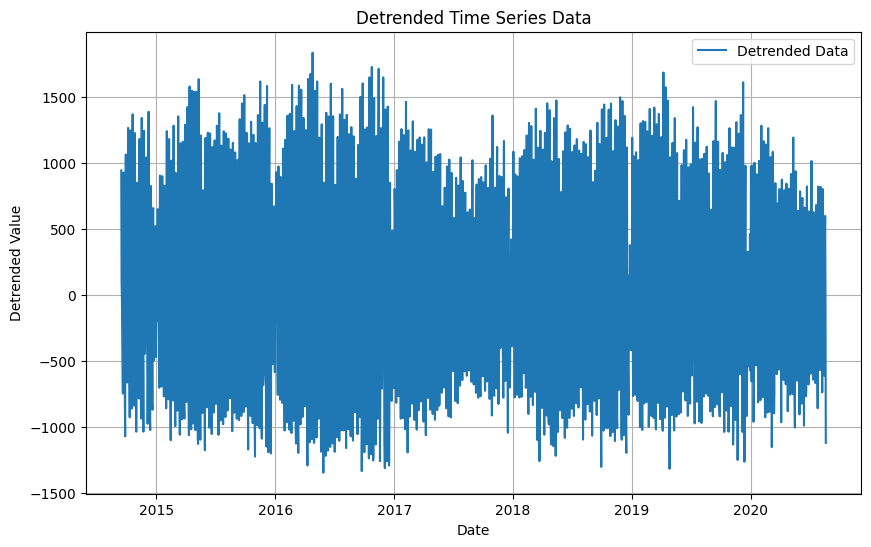

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the difference between consecutive values in the column
df['detrended_column'] = df['Unique.Visits'].diff()


df.dropna(inplace=True)

# Plot the detrended data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['detrended_column'], label='Detrended Data')
plt.xlabel('Date')
plt.ylabel('Detrended Value')
plt.title('Detrended Time Series Data')
plt.legend()
plt.grid(True)
plt.show()


### A DETREND INVOLVES REMOVING THE EFFECTS OF THE TREND FROM THE DATASET TO SHOW ONLY THE DIFFERENCE IN THE NO OF UNIQUE VISITORS FROM THE TREND: AS WE CAN SEE AFTER DETRENDING THERE IS SOMEWHAT CONSTANT GRAPH FOR NO OF UNIQUE VISITORS ON WEBSITE.

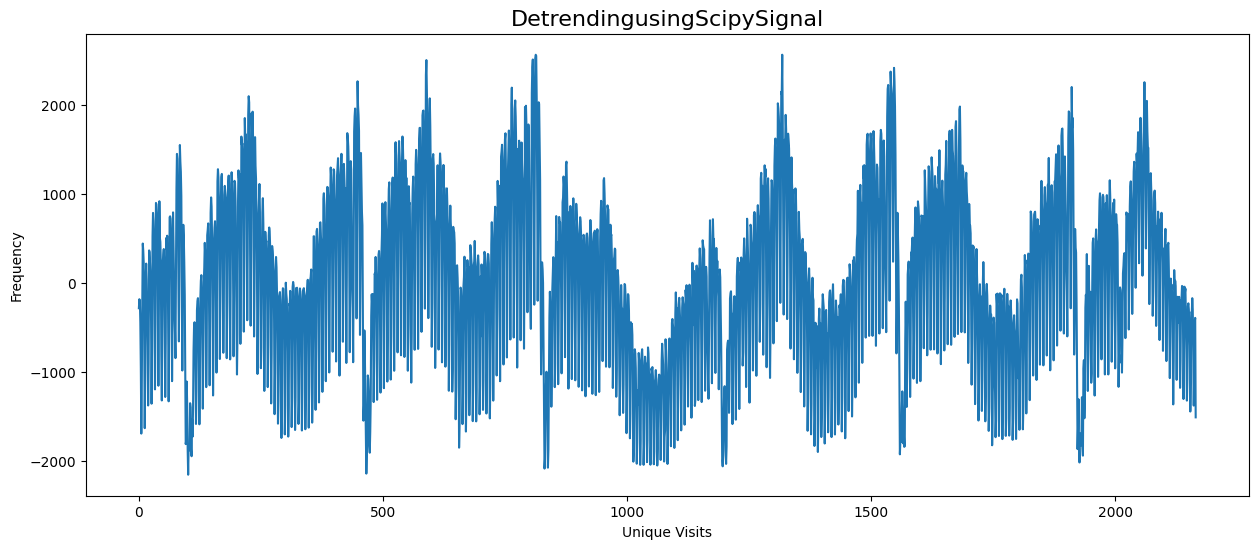

In [ ]:
from scipy import signal
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


detrended=signal.detrend(df['Unique.Visits'])
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('Unique Visits')
plt.ylabel('Frequency')
plt.title('DetrendingusingScipySignal',fontsize=16)
plt.show()

In [ ]:
df.head()

,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,detrended_column
Date,,,,,,,
2014-09-15,Monday,2,3621,2528,2297,231,946.0
2014-09-16,Tuesday,3,3698,2630,2352,278,102.0
2014-09-17,Wednesday,4,3667,2614,2327,287,-16.0
2014-09-18,Thursday,5,3316,2366,2130,236,-248.0
2014-09-19,Friday,6,2815,1863,1622,241,-503.0


# DETECTING SEASONALITY USING MULTIPLE BOX PLOTS

## RESETTING THE INDEX TO NORMAL

In [ ]:
df_reset = df.reset_index()

In [ ]:
df_reset.head()

,Date,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,detrended_column
0,2014-09-15,Monday,2,3621,2528,2297,231,946.0
1,2014-09-16,Tuesday,3,3698,2630,2352,278,102.0
2,2014-09-17,Wednesday,4,3667,2614,2327,287,-16.0
3,2014-09-18,Thursday,5,3316,2366,2130,236,-248.0
4,2014-09-19,Friday,6,2815,1863,1622,241,-503.0


In [ ]:
df_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166 entries, 0 to 2165
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2166 non-null   datetime64[ns]
 1   Day                2166 non-null   object        
 2   Day.Of.Week        2166 non-null   int64         
 3   Page.Loads         2166 non-null   int64         
 4   Unique.Visits      2166 non-null   int64         
 5   First.Time.Visits  2166 non-null   int64         
 6   Returning.Visits   2166 non-null   int64         
 7   detrended_column   2166 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.5+ KB


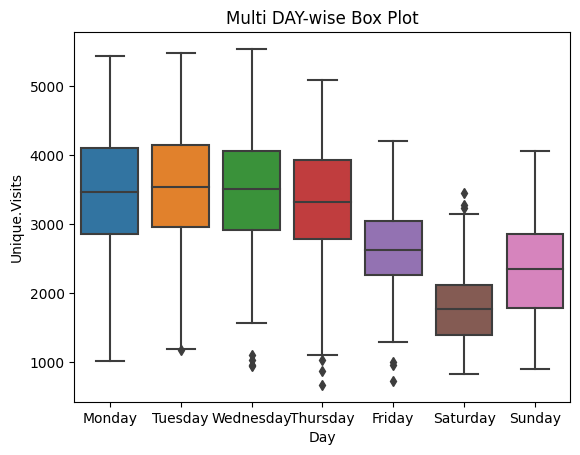

In [ ]:
import seaborn as sns
sns.boxplot(x=df_reset['Day'], y=df_reset['Unique.Visits'], data=df_reset).set_title("Multi DAY-wise Box Plot")
plt.show()

In [ ]:
df_reset['year'] = [d.year for d in df_reset.Date]

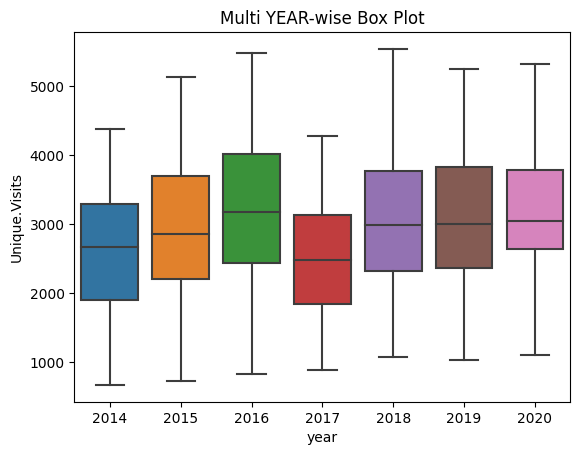

In [ ]:
sns.boxplot(x=df_reset['year'], y=df_reset['Unique.Visits'], data=df_reset).set_title("Multi YEAR-wise Box Plot")
plt.show()

In [ ]:
df_reset['month'] = df_reset['Date'].dt.strftime('%b')

In [ ]:
df_reset.head()

,Date,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,detrended_column,year,month
0,2014-09-15,Monday,2,3621,2528,2297,231,946.0,2014,Sep
1,2014-09-16,Tuesday,3,3698,2630,2352,278,102.0,2014,Sep
2,2014-09-17,Wednesday,4,3667,2614,2327,287,-16.0,2014,Sep
3,2014-09-18,Thursday,5,3316,2366,2130,236,-248.0,2014,Sep
4,2014-09-19,Friday,6,2815,1863,1622,241,-503.0,2014,Sep


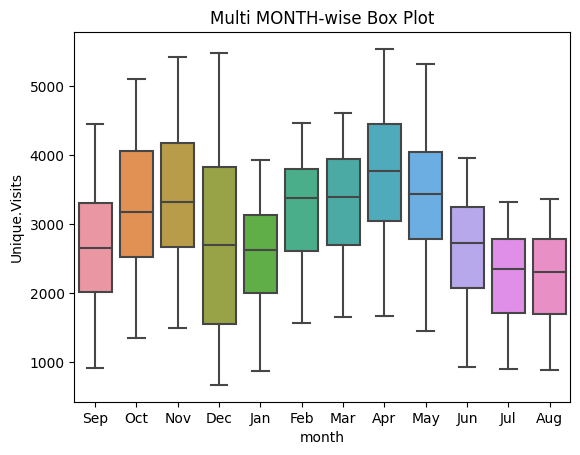

In [ ]:
sns.boxplot(x=df_reset['month'], y=df_reset['Unique.Visits'], data=df_reset).set_title("Multi MONTH-wise Box Plot")
plt.show()

## Since The Mean for Variations in Box plots aren't Constant , This Indicaates there is Seasonality Present in the Monthly Unique Visitors on the Website.

## ACF AND PACF FUNCTIONS

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

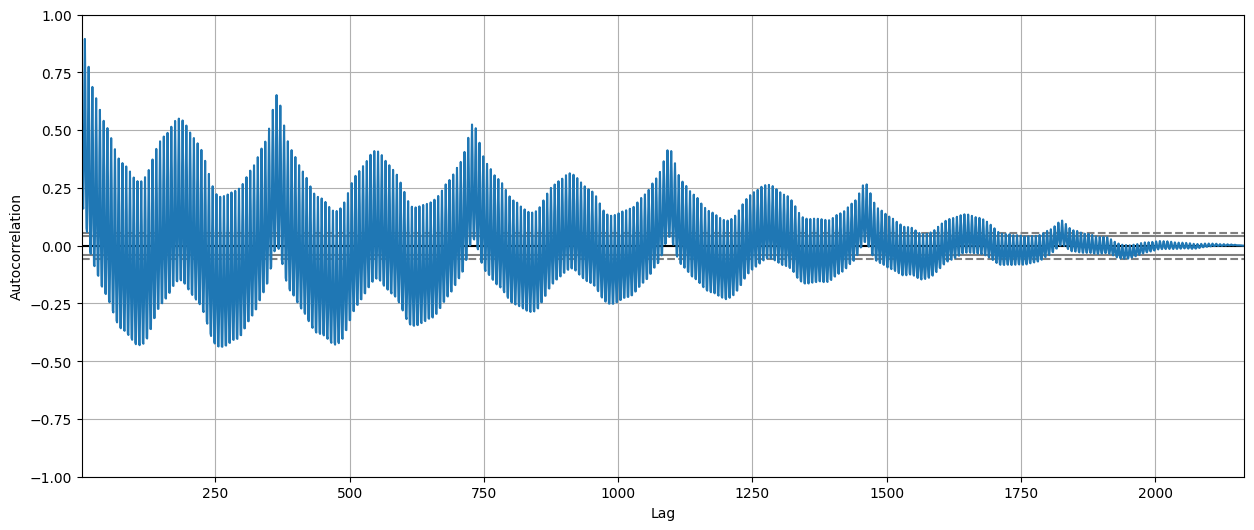

In [ ]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
col = df_reset['Unique.Visits']
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(col.tolist())

In [ ]:
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

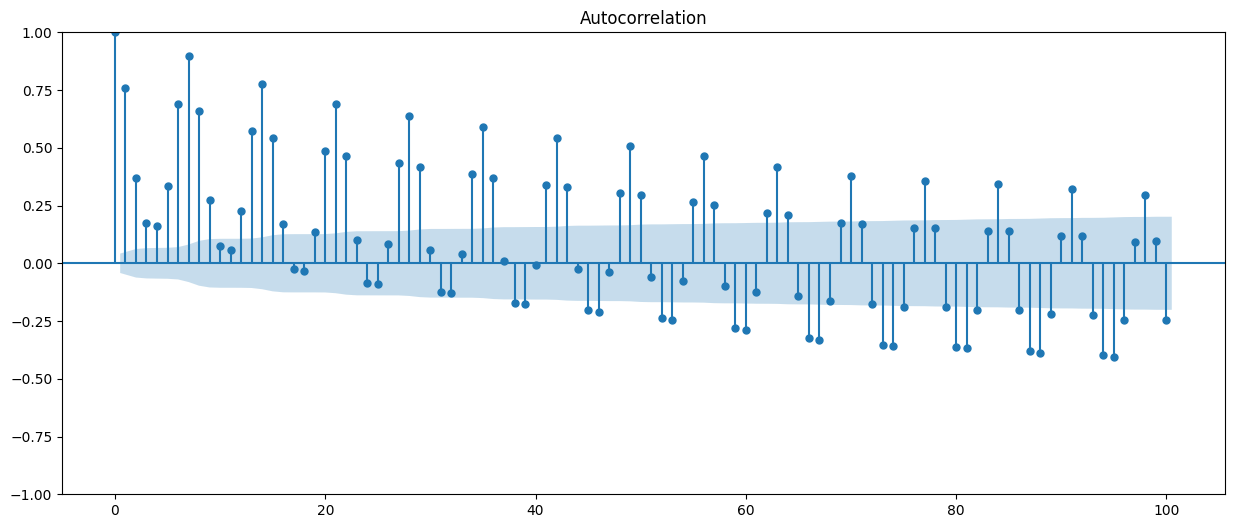

In [ ]:
acf_plot = plot_acf(df['Unique.Visits'], lags=100)

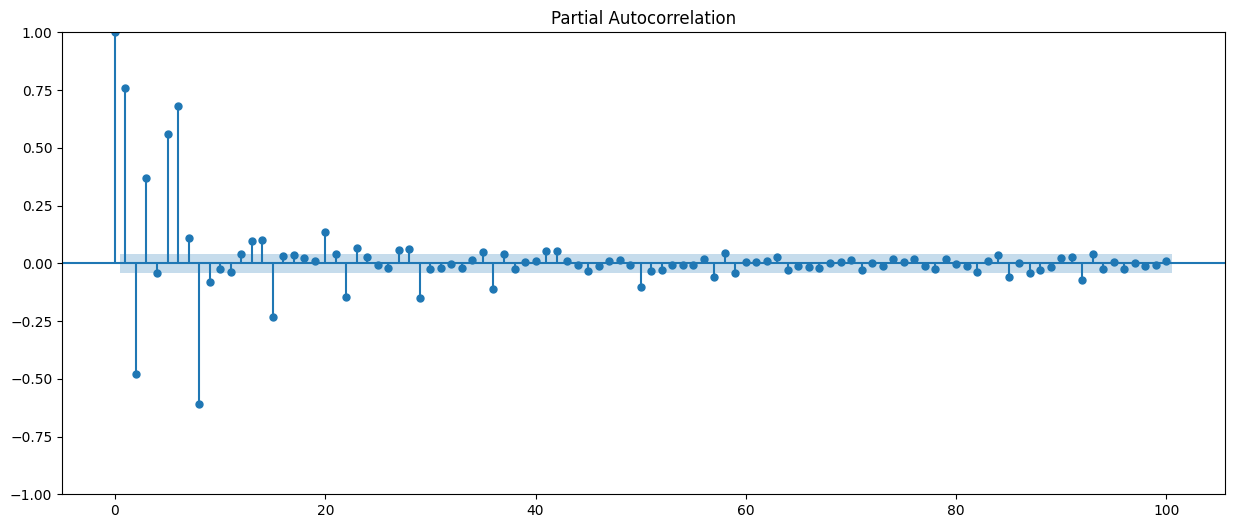

In [ ]:
acf_plot = plot_pacf(df['Unique.Visits'], lags=100)

## SEASONALITY - Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of  time

## Detecting Seasonality using Autocorrelation Plot:
### Autocorrelation is used to check randomness in data

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

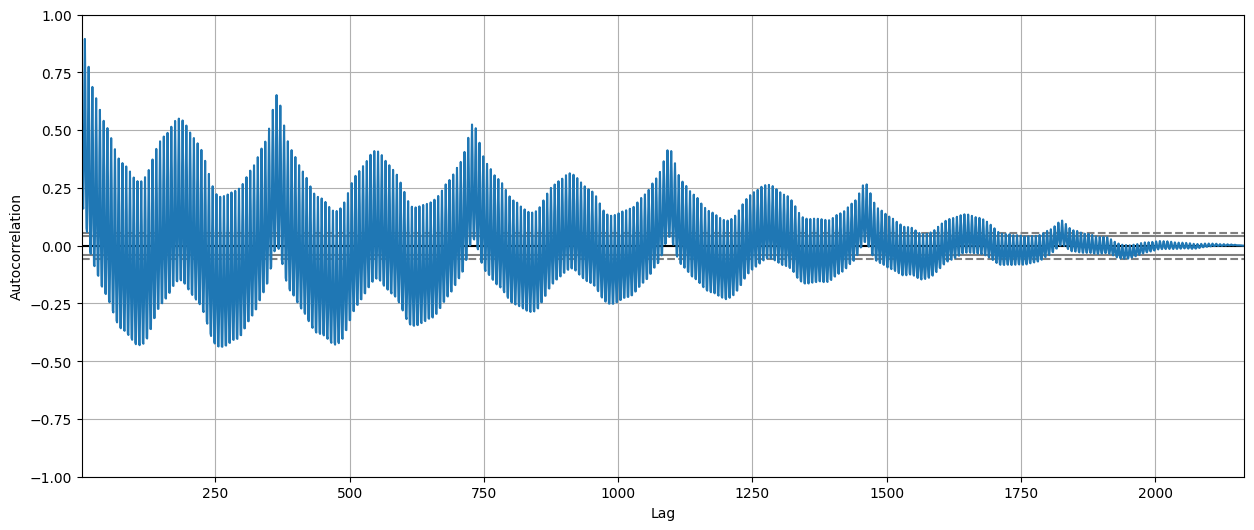

In [ ]:
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df['Unique.Visits'].tolist())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

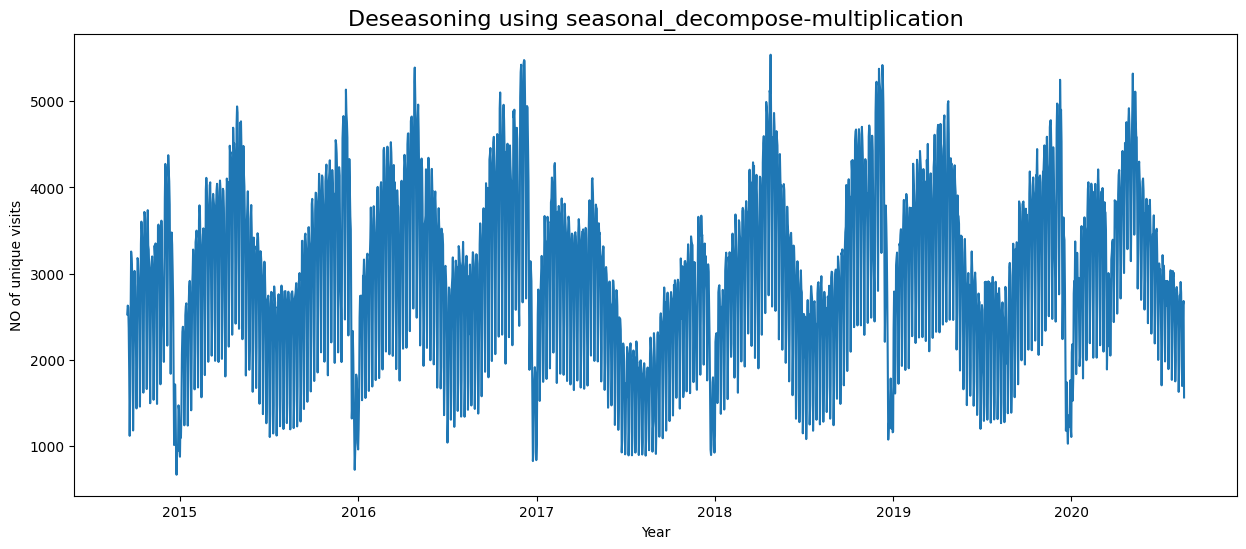

In [ ]:
result_mul= seasonal_decompose(df['Unique.Visits'], model='multiplicative')
deseason= df['Unique.Visits'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose-multiplication', fontsize=16)
plt.xlabel('Year')
plt.ylabel('NO of unique visits')
plt.show()

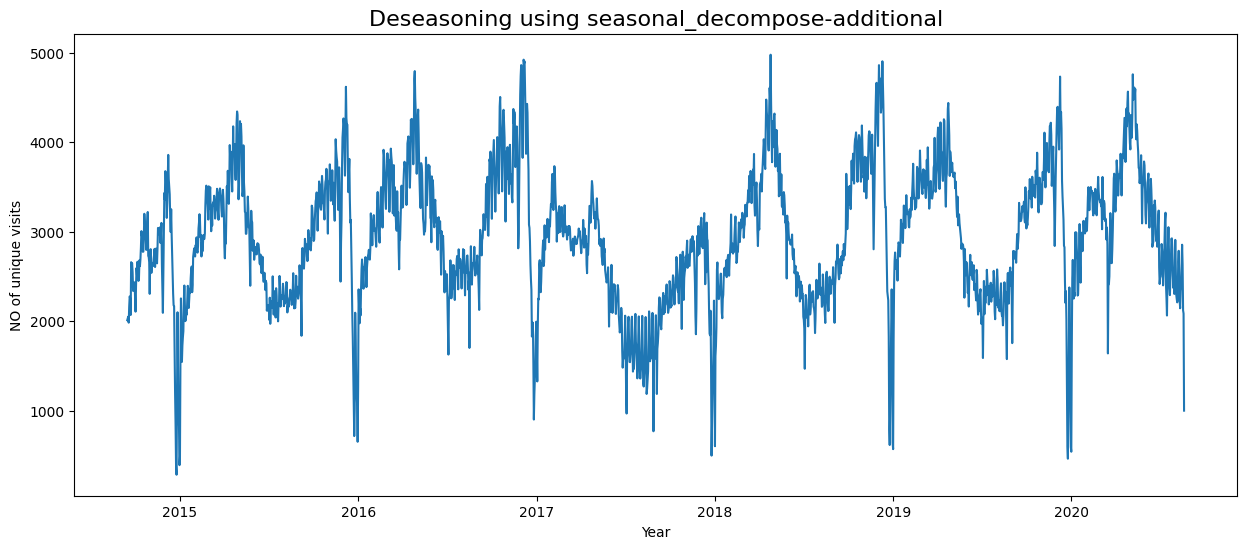

In [ ]:
result_add= seasonal_decompose(df['Unique.Visits'], model='additive')
deseason= df['Unique.Visits'] - result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose-additional', fontsize=16)
plt.xlabel('Year')
plt.ylabel('NO of unique visits')
plt.show()

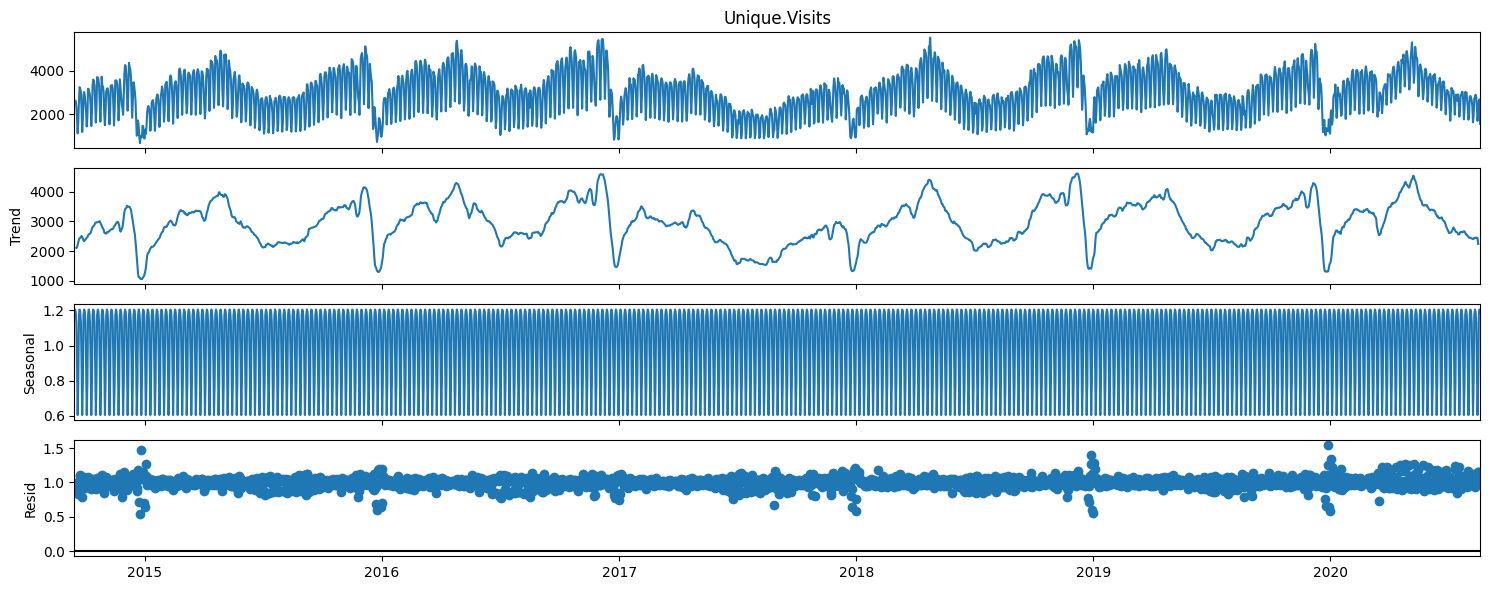

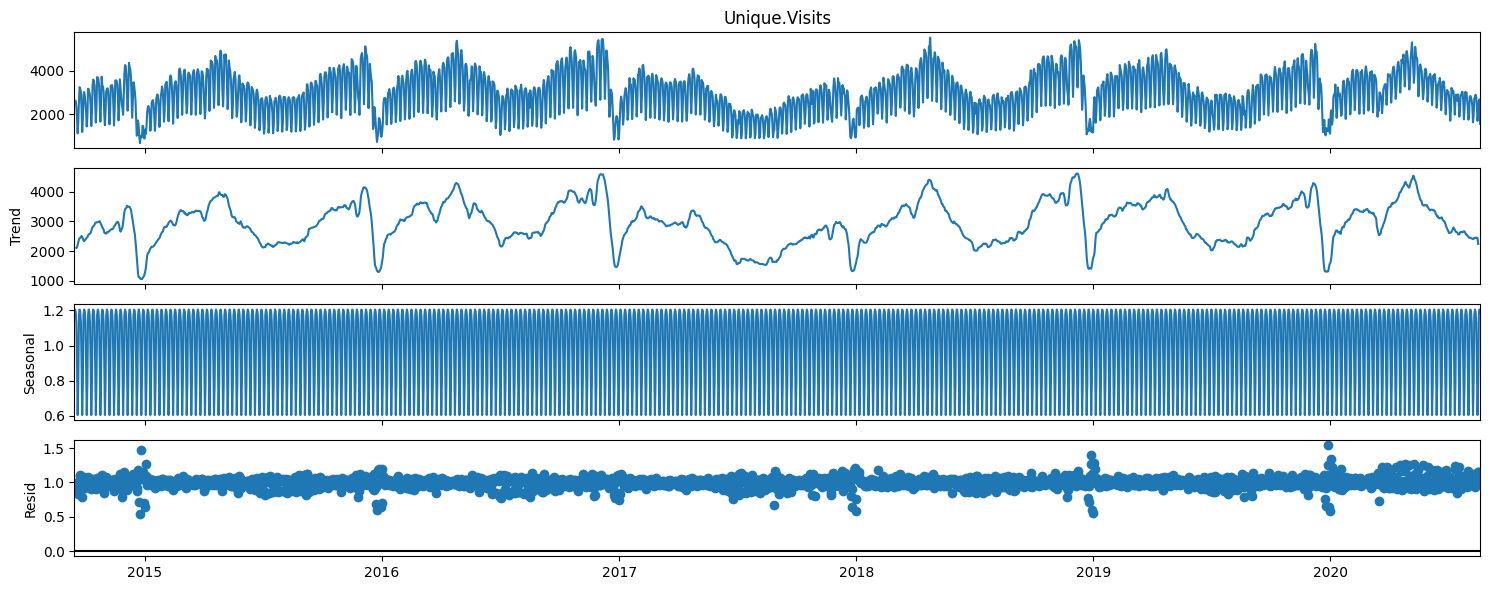

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Unique.Visits'],model='mul')
result.plot()

In [ ]:
X = df['Unique.Visits']
test = X.iloc[-30:] #Data expected for last 30 days
train = X.iloc[:-30] #Last 30 days to evaluate prediction

In [ ]:
test

Date
2020-07-21    2889
2020-07-22    3039
2020-07-23    3033
2020-07-24    2623
2020-07-25    1767
2020-07-26    2207
2020-07-27    3031
2020-07-28    2969
2020-07-29    3010
2020-07-30    2687
2020-07-31    2317
2020-08-01    1750
2020-08-02    1993
2020-08-03    2814
2020-08-04    2845
2020-08-05    2774
2020-08-06    2625
2020-08-07    2364
2020-08-08    1628
2020-08-09    1941
2020-08-10    2745
2020-08-11    2742
2020-08-12    2904
2020-08-13    2780
2020-08-14    2308
2020-08-15    1696
2020-08-16    2037
2020-08-17    2638
2020-08-18    2683
2020-08-19    1564
Name: Unique.Visits, dtype: int64

In [ ]:
from sklearn import metrics
from statsmodels.tsa.api import SimpleExpSmoothing
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(train)).fit(i)
    fcst_pred_v= fit_v.forecast(30)
    timeseries_evaluation_metrics_func(test,fcst_pred_v)
    rmse = np.sqrt(metrics.mean_squared_error(test, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)
temp_df.sort_values(by=['RMSE'])

Fitting for smoothing level= 0
Evaluation metric results:-
MSE is : 221911.5
MAE is : 403.03333333333336
RMSE is : 471.0748348192673
MAPE is : 18.643711809153093
R2 is : -0.010447319923964082

Fitting for smoothing level= 0.1
Evaluation metric results:-
MSE is : 246740.4590493971
MAE is : 382.90000000000003
RMSE is : 496.72976460989037
MAPE is : 18.703867187576925
R2 is : -0.1235029981018192

Fitting for smoothing level= 0.2
Evaluation metric results:-
MSE is : 225364.89237785852
MAE is : 397.4504808604528
RMSE is : 474.72612354689153
MAPE is : 18.628735628614702
R2 is : -0.02617192668320345

Fitting for smoothing level= 0.3
Evaluation metric results:-
MSE is : 222188.22589752768
MAE is : 402.4720594537309
RMSE is : 471.36846086424544
MAPE is : 18.64220617399737
R2 is : -0.011707358009013236

Fitting for smoothing level= 0.4
Evaluation metric results:-
MSE is : 222568.4141349854
MAE is : 401.7481151855272
RMSE is : 471.7715698672244
MAPE is : 18.640264170315017
R2 is : -0.0134384994127

,smoothing parameter,RMSE
0,0.0,471.074835
3,0.3,471.368461
4,0.4,471.771570
2,0.2,474.726124
5,0.5,475.683538
6,0.6,485.809769
1,0.1,496.729765
7,0.7,505.145964
8,0.8,534.822129
9,0.9,573.249465


In [ ]:
#using values from grid search
fitSES = SimpleExpSmoothing(np.asarray(train)).fit( smoothing_level = 0.0,optimized= False)
fcst_gs_pred = fitSES.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_gs_pred)

Evaluation metric results:-
MSE is : 221911.5
MAE is : 403.03333333333336
RMSE is : 471.0748348192673
MAPE is : 18.643711809153093
R2 is : -0.010447319923964082



In [ ]:
#Automated smoothing_level
fitSESauto = SimpleExpSmoothing(np.asarray(train)).fit( optimized= True, use_brute = True)
fcst_auto_pred = fitSESauto.forecast(30)
timeseries_evaluation_metrics_func(test,fcst_auto_pred)

Evaluation metric results:-
MSE is : 377601.4451455804
MAE is : 446.2719777858535
RMSE is : 614.4928357154218
MAPE is : 22.667807823193822
R2 is : -0.7193627560841482



In [ ]:
fitSESauto.summary()

Dep. Variable:,endog,No. Observations:,2136
Model:,SimpleExpSmoothing,SSE,994343200.386
Optimized:,True,AIC,27880.728
Trend:,None,BIC,27892.062
Seasonal:,None,AICC,27880.747
Seasonal Periods:,None,Date:,"Tue, 05 Dec 2023"
Box-Cox:,False,Time:,17:49:57
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,2528.0000,l.0,False


#**DICKY FULLER TEST**


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Day'])
list(le.classes_)
df['Day'] = le.transform(df['Day'])

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

In [ ]:
df.rename(columns={'Unique.Visits': 'UniqueVisits'}, inplace=True)

In [ ]:
df.head()

,Day,Day.Of.Week,Page.Loads,UniqueVisits,First.Time.Visits,Returning.Visits,detrended_column
Date,,,,,,,
2014-09-15,1,2,3621,2528,2297,231,946.0
2014-09-16,5,3,3698,2630,2352,278,102.0
2014-09-17,6,4,3667,2614,2327,287,-16.0
2014-09-18,4,5,3316,2366,2130,236,-248.0
2014-09-19,0,6,2815,1863,1622,241,-503.0


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic')

    dfoutput = pd.Series(dftest[0:4], index=['','','',''])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")


In [ ]:
Augmented_Dickey_Fuller_Test_func(df['UniqueVisits'],'UniqueVisits')

Results of Dickey-Fuller Test for column: UniqueVisits
Conclusion:====>
Reject the null hypothesis
Data is stationary


#**ARIMA**

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [ ]:
import warnings

import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

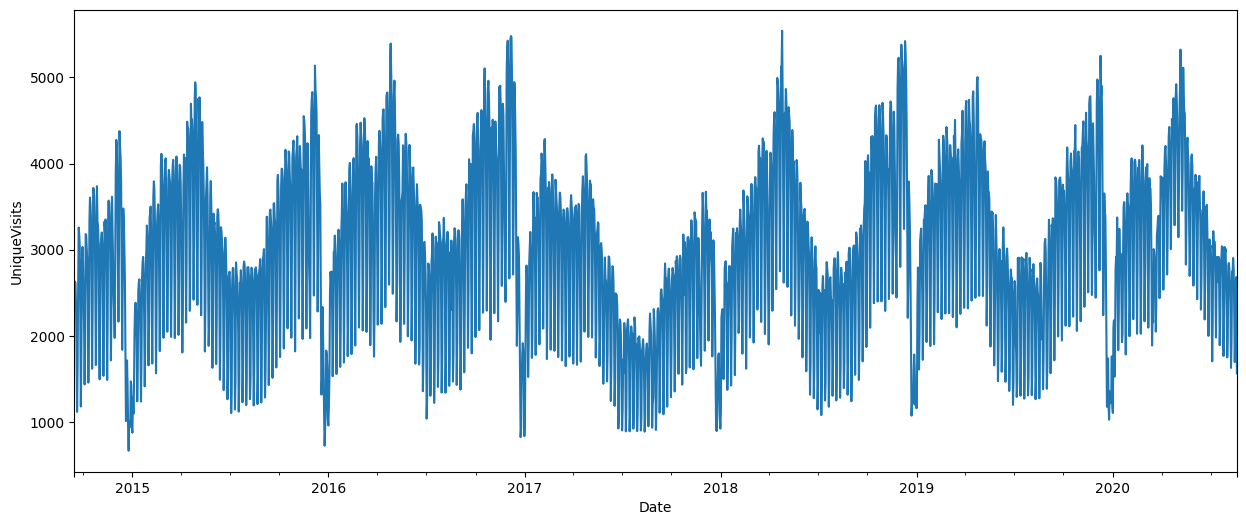

In [ ]:
df["UniqueVisits"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("UniqueVisits")
plt.show()

## DATA IS STATIONARY BECAUSE MEAN AND VARIANCE IS CONSTANT OVERTIME -> THEREFORE APPLYING ARIMA MODEL

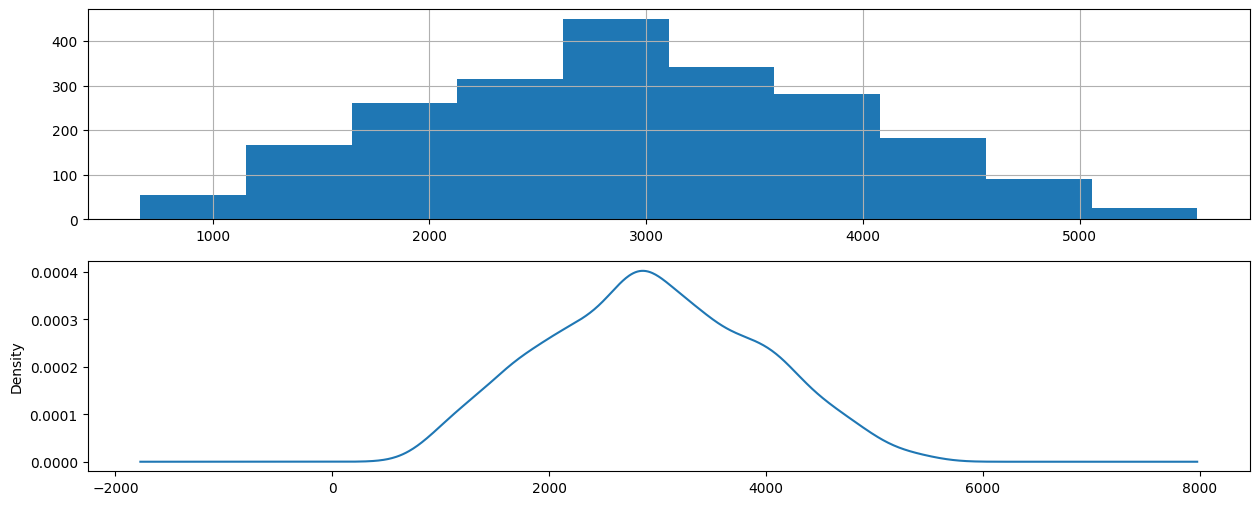

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["UniqueVisits"].hist()
plt.subplot(212)
df["UniqueVisits"].plot(kind='kde')
plt.show()

In [ ]:
# Train test split
X = df[['UniqueVisits' ]]
train, test = X[0:-100], X[-100:]

In [ ]:
# Stepwise arima model
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=32158.851, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=32840.281, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=32638.494, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=32175.776, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=32838.288, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31381.591, Time=4.77 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31941.398, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=31897.802, Time=1.53 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31346.289, Time=6.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31594.222, Time=8.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=31277.894, Time=9.44 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=29324.404, Time=12.47 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=30349.345, Time=7.09 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=29114.320, Time=12.84 sec
 ARIMA(5,1,1)(0,0

In [ ]:
# summary of model
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2066
Model:               SARIMAX(7, 1, 1)   Log Likelihood              -14298.891
Date:                Tue, 05 Dec 2023   AIC                          28615.781
Time:                        17:52:58   BIC                          28666.477
Sample:                    09-15-2014   HQIC                         28634.366
                         - 05-11-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0200      0.023      0.872      0.383      -0.025       0.065
ar.L2         -0.2794      0.015    -19.051      0.000      -0.308      -0.251
ar.L3         -0.0999      0.020     -5.063      0.000      -0.139      -0.061
ar.L4         -0.1487      0.017     -8.814      0.000      -0.182      -0.116
ar.L5         -0.2285      0.017    -13.833      0.000      -0.261      -0.196
ar.L6         -0.0047      0.019     -0.252      0.801      -0.041       0.032
ar.L7          0.6224      0.015     42.514      0.000       0.594       0.651
ma.L1         -0.0890      0.029     -3.079      0.002      -0.146      -0.032
sigma2      6.048e+04   1512.437     39.991      0.000    5.75e+04    6.34e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               208.96
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                            -0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
## Creating a Dataframe of true values and predicted values and calculating the errors:

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(1229, 1259)
df_conf = df_conf.set_index("new_index")

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-


ValueError: ignored

In [ ]:
forecast["new_index"] = range(1229, 1259)
forecast = forecast.set_index("new_index")

In [ ]:
## Plotting the predicted and true values

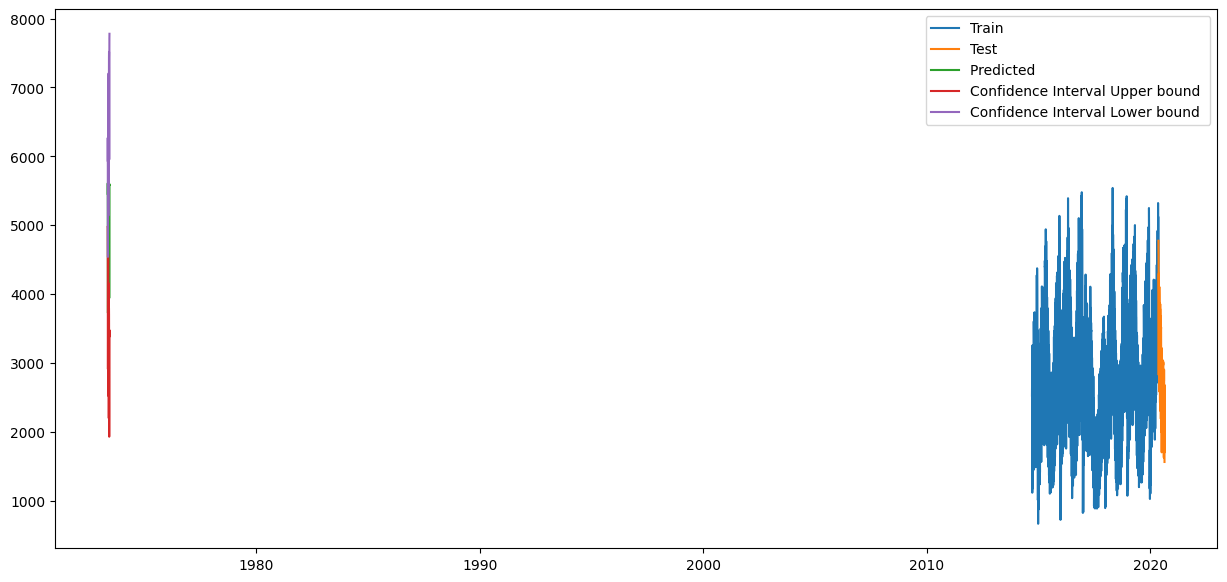

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

#**Vector Autoregression(VAR)**

In [ ]:
from statsmodels.tsa.api import VAR
from sklearn import metrics
from timeit import default_timer as timer

In [ ]:
df.columns

Index(['Day', 'Day.Of.Week', 'Page.Loads', 'UniqueVisits', 'First.Time.Visits',
       'Returning.Visits', 'detrended_column'],
      dtype='object')

In [ ]:
df.rename(columns={'Page.Loads': 'PageLoads'}, inplace=True)
df.rename(columns={'First.Time.Visits': 'FirstTimeVisits'}, inplace=True)
df.rename(columns={'Returning.Visits': 'ReturningVisits'}, inplace=True)

In [ ]:
df.head()

,Day,Day.Of.Week,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,detrended_column
Date,,,,,,,
2014-09-15,1,2,3621,2528,2297,231,946.0
2014-09-16,5,3,3698,2630,2352,278,102.0
2014-09-17,6,4,3667,2614,2327,287,-16.0
2014-09-18,4,5,3316,2366,2130,236,-248.0
2014-09-19,0,6,2815,1863,1622,241,-503.0


In [ ]:
df.columns

Index(['Day', 'Day.Of.Week', 'PageLoads', 'UniqueVisits', 'FirstTimeVisits',
       'ReturningVisits', 'detrended_column'],
      dtype='object')

In [ ]:
X = df[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
for name, column in train_diff[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: PageLoads
Test Statistic                -1.225014e+01
p-value                        9.581871e-23
No Lags Used                   2.600000e+01
Number of Observations Used    2.108000e+03
Critical Value (1%)           -3.433456e+00
Critical Value (5%)           -2.862912e+00
Critical Value (10%)          -2.567500e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: UniqueVisits
Test Statistic                -1.215295e+01
p-value                        1.555148e-22
No Lags Used                   2.600000e+01
Number of Observations Used    2.108000e+03
Critical Value (1%)           -3.433456e+00
Critical Value (5%)           -2.862912e+00
Critical Value (10%)          -2.567500e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: FirstTimeVisits
Test Statistic                -1.213603e+01
p-value        

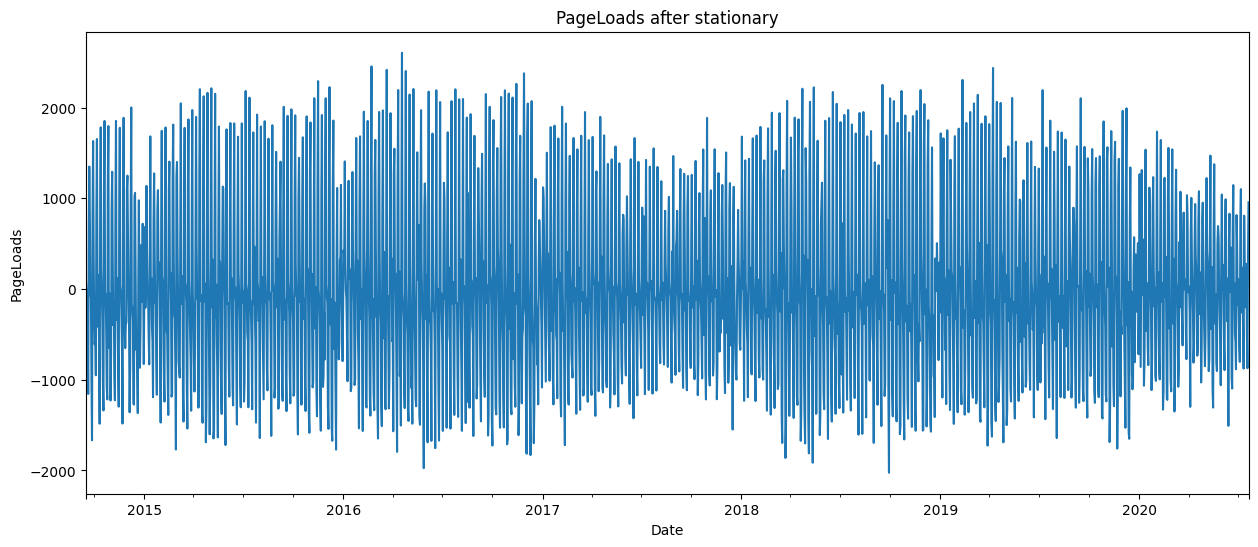

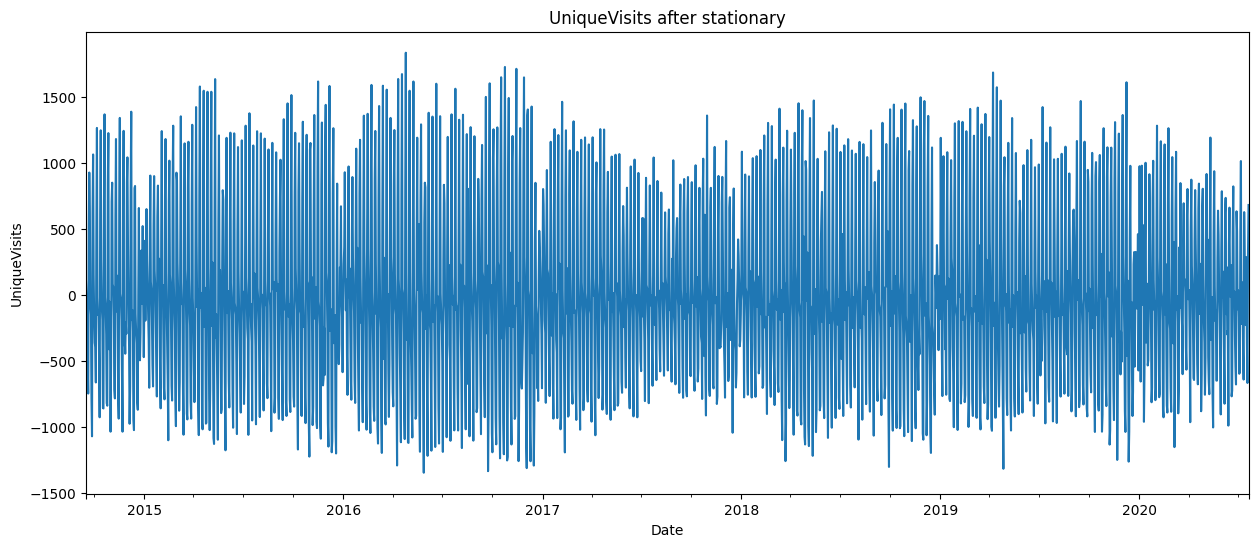

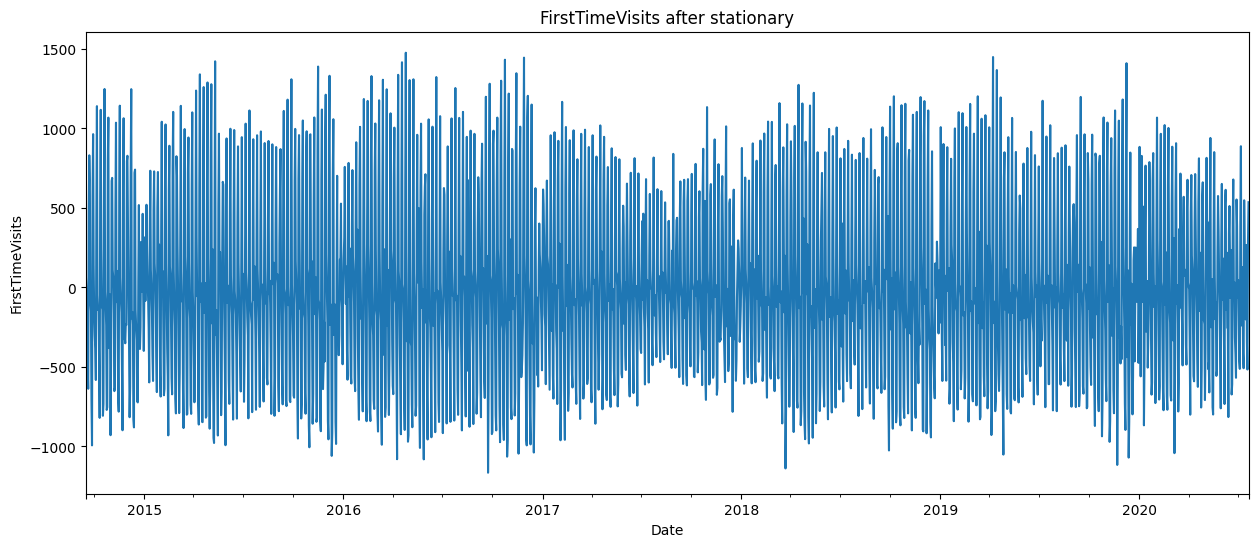

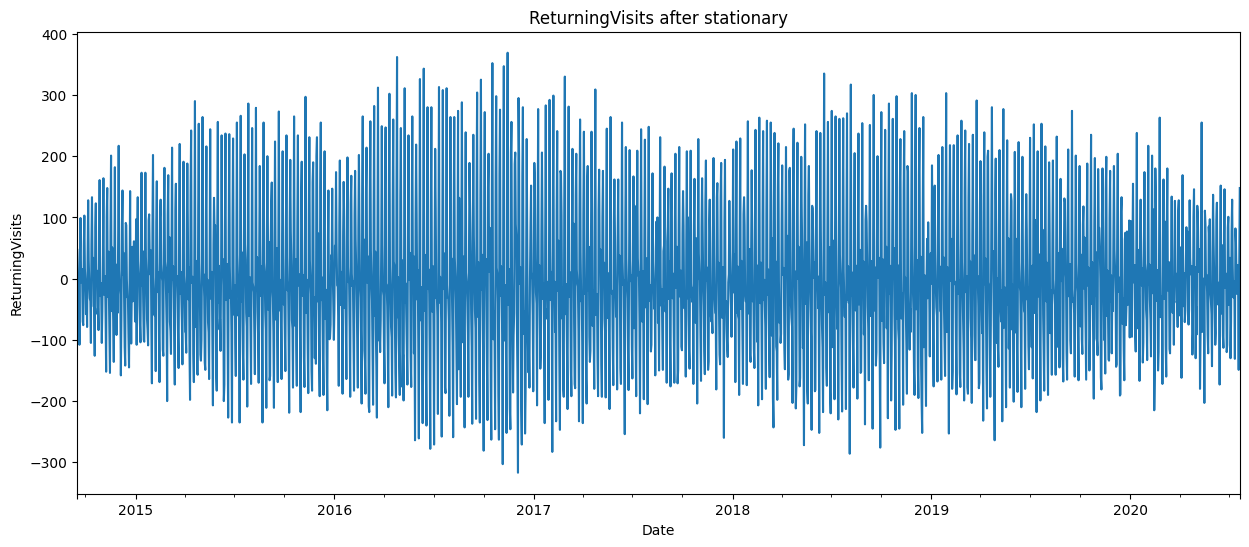

In [ ]:
for c in train_diff[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits']]:
    train_diff[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} after stationary")
    plt.show()

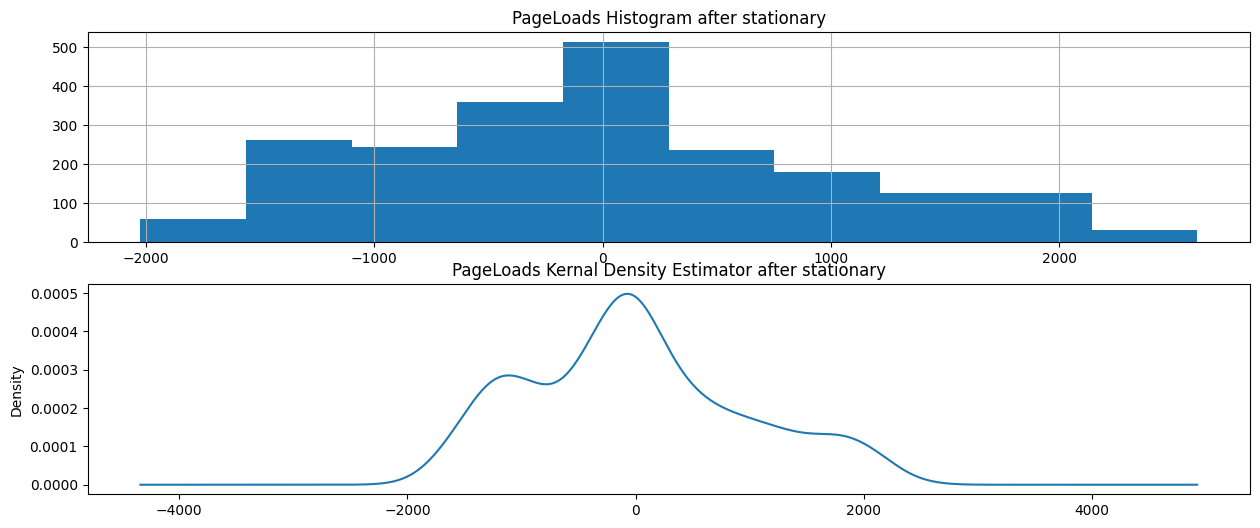

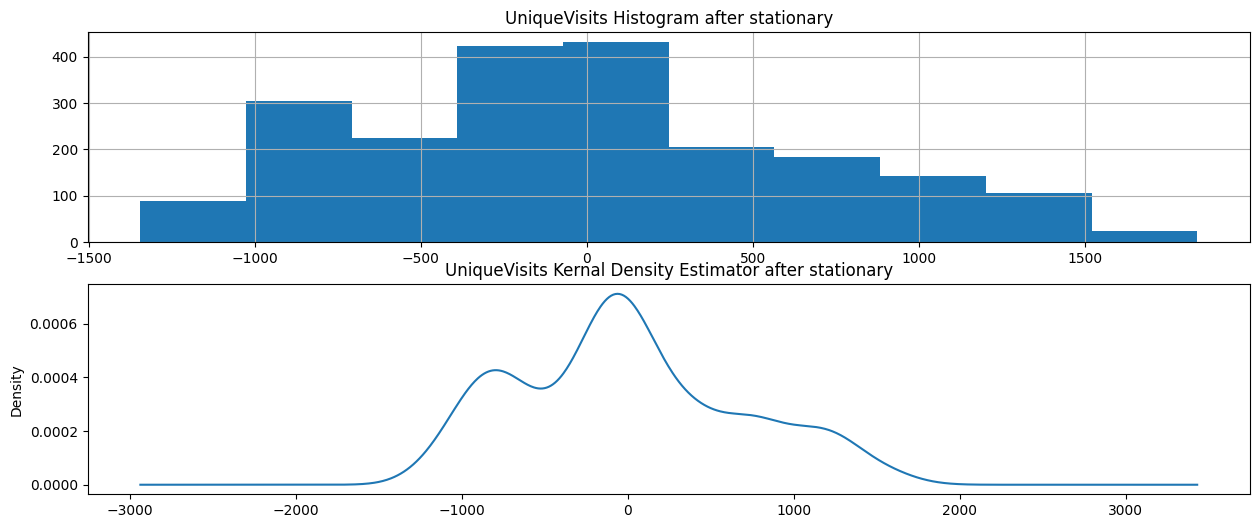

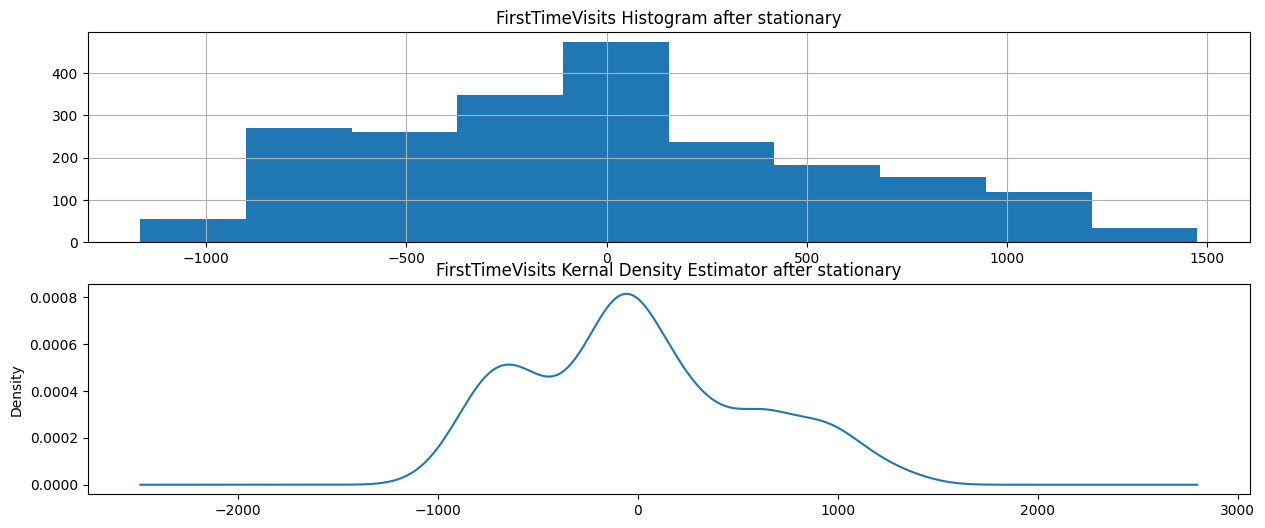

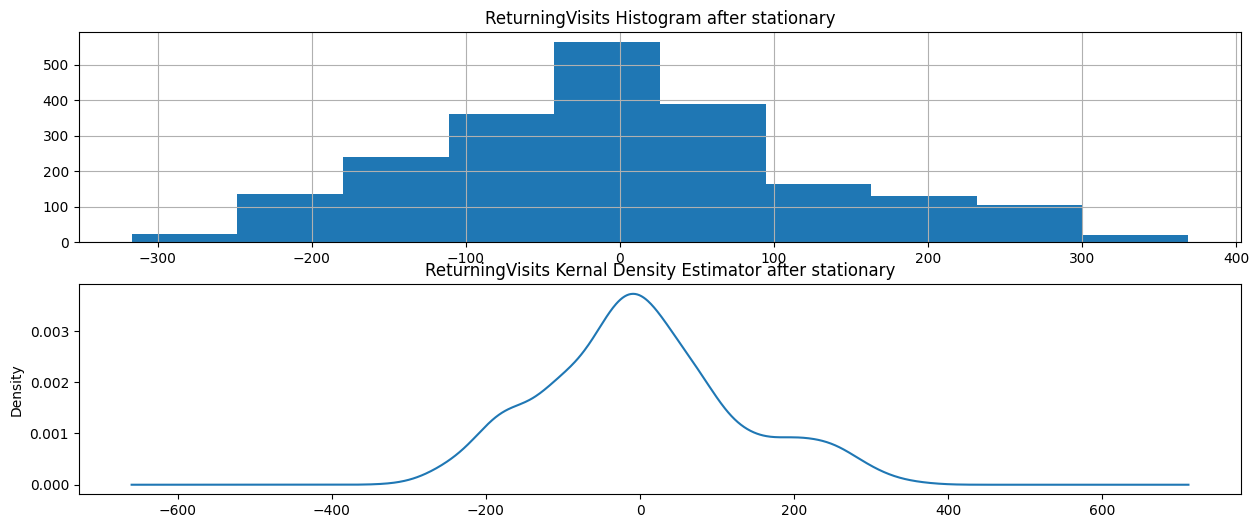

In [ ]:
for c in train_diff[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_diff[str(c)].hist()
    plt.subplot(212)
    train_diff[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [ ]:
train_diff.head(10)

,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
Date,,,,
2014-09-16,77.0,102.0,55.0,47.0
2014-09-17,-31.0,-16.0,-25.0,9.0
2014-09-18,-351.0,-248.0,-197.0,-51.0
2014-09-19,-501.0,-503.0,-508.0,5.0
2014-09-20,-1157.0,-745.0,-637.0,-108.0
2014-09-21,630.0,538.0,496.0,42.0
2014-09-22,1350.0,930.0,831.0,99.0
2014-09-23,824.0,671.0,677.0,-6.0
2014-09-24,-48.0,-82.0,-98.0,16.0


#**Cointegration test**

A **cointegration test** is the co-movement among underlying variables over the long run.

Cointegration analysis aims to uncover causal relations among variables by determining if the stochastic trends in a group of variables are shared by the series. If these trends are shared, either one variable causes the other or they are both driven by a third variable.

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from numpy.linalg import LinAlgError

def cointegration_test(df):
    try:
        res = coint_johansen(df, -1, 5)
        d = {'0.90': 0, '0.95': 1, '0.99': 2}
        traces = res.lr1  # Trace statistics
        cvts = res.cvt[:, d[str(1 - 0.05)]]  # Critical values (90%, 95%, 99%) for trace statistic.

        def adjust(val, length=6):
            return str(val).ljust(length)  # string left justified (ljust)

        print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--' * 20)
        for col, trace, cvt in zip(df.columns, traces, cvts):
            print(adjust(col), '> ', adjust(round(trace, 2), 9), ">", adjust(cvt, 8), ' =>  ', trace > cvt)

    except LinAlgError as e:
        print(f"LinAlgError: {e}. There may be an issue with multicollinearity or singularity in the variables.")
        # Print additional information or take corrective actions as needed.

# Example usage
cointegration_test(train_diff[['PageLoads', 'UniqueVisits', 'FirstTimeVisits', 'ReturningVisits']])


LinAlgError: Matrix is not positive definite. There may be an issue with multicollinearity or singularity in the variables.


In [ ]:
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    try:
        model = VAR(train_diff)
        results = model.fit(i)
        print(f'Order: {i}, AIC: {results.aic}, BIC: {results.bic}')
    except LinAlgError as e:
        print(f"LinAlgError: {e}. There may be an issue with multicollinearity or singularity in the variables.")
        # Print additional information or take corrective actions as needed.


Order: 1, AIC: 3.5286694774109977, BIC: 3.5817693221332254
Order: 2, AIC: 5.329004682219411, BIC: 5.424621301940447
Order: 3, AIC: 4.489264674605758, BIC: 4.627430913271264
Order: 4, AIC: 5.197336021871028, BIC: 5.378084764706648
LinAlgError: 4-th leading minor of the array is not positive definite. There may be an issue with multicollinearity or singularity in the variables.
LinAlgError: 4-th leading minor of the array is not positive definite. There may be an issue with multicollinearity or singularity in the variables.
Order: 7, AIC: 2.9283948988946182, BIC: 3.23708887946489
LinAlgError: 4-th leading minor of the array is not positive definite. There may be an issue with multicollinearity or singularity in the variables.
LinAlgError: 4-th leading minor of the array is not positive definite. There may be an issue with multicollinearity or singularity in the variables.


In [ ]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
results = model.fit(4)
display(results.summary())
z = results.forecast(y=train_diff[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]].values, steps=30)
df_pred = pd.DataFrame(z, columns=['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits'  ])

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 05, Dec, 2023
Time:                     17:53:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    5.37808
Nobs:                     2131.00    HQIC:                   5.26349
Log likelihood:          -17564.8    FPE:                    180.790
AIC:                      5.19734    Det(Omega_mle):        -32.5758
--------------------------------------------------------------------
Results for equation PageLoads
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      0.433723        13.032039            0.033           0.973
L1.PageLoads              -0.705286         0.109096           -6.465           0.000
L1.UniqueVisits            0.317510 

In [ ]:
df_pred["new_index"] = range(233, 263)
df_pred = df_pred.set_index("new_index")

In [ ]:
df_pred

,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits
new_index,,,,
233,88.723049,61.864107,50.067232,11.796875
234,-95.975805,-68.157220,-53.606535,-14.550685
235,-142.319324,-111.192876,-95.771417,-15.421459
236,-578.912989,-411.321297,-341.645014,-69.676283
237,-177.645538,-120.227492,-95.185953,-25.041539
238,428.121973,306.267267,255.156356,51.110911
239,296.119680,207.101569,169.617754,37.483815
240,80.730720,59.920588,52.337069,7.583519
241,-8.424375,-5.083548,-5.966795,0.883247


In [ ]:
res = inverse_diff(df[['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]],df_pred)

In [ ]:
res

,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,PageLoads_1st_inv_diff,UniqueVisits_1st_inv_diff,FirstTimeVisits_1st_inv_diff,ReturningVisits_1st_inv_diff
new_index,,,,,,,,
233,88.723049,61.864107,50.067232,11.796875,2152.723049,1625.864107,1347.067232,278.796875
234,-95.975805,-68.157220,-53.606535,-14.550685,2056.747243,1557.706887,1293.460697,264.246190
235,-142.319324,-111.192876,-95.771417,-15.421459,1914.427920,1446.514011,1197.689280,248.824731
236,-578.912989,-411.321297,-341.645014,-69.676283,1335.514931,1035.192715,856.044266,179.148448
237,-177.645538,-120.227492,-95.185953,-25.041539,1157.869393,914.965223,760.858314,154.106909
238,428.121973,306.267267,255.156356,51.110911,1585.991366,1221.232490,1016.014670,205.217820
239,296.119680,207.101569,169.617754,37.483815,1882.111046,1428.334059,1185.632424,242.701635
240,80.730720,59.920588,52.337069,7.583519,1962.841766,1488.254647,1237.969493,250.285154
241,-8.424375,-5.083548,-5.966795,0.883247,1954.417390,1483.171099,1232.002698,251.168401


In [ ]:
for i in ['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)] , res[str(i)+'_1st_inv_diff'])

Evaluation metric for PageLoads
Evaluation metric results:-
MSE is : 2687414.654784539
MSE is : 1560.6267723227759
RMSE is : 1639.3336008221568
MAPE is : 46.33516294309027
R2 is : -6.363432251562662

Evaluation metric for UniqueVisits
Evaluation metric results:-
MSE is : 1525931.9034642004
MSE is : 1170.8479730690508
RMSE is : 1235.2861625810435
MAPE is : 45.69210787421667
R2 is : -5.948147357130542

Evaluation metric for FirstTimeVisits
Evaluation metric results:-
MSE is : 1102017.3945169144
MSE is : 993.2205537519596
RMSE is : 1049.77016271035
MAPE is : 46.16580712072423
R2 is : -5.81324568761585

Evaluation metric for ReturningVisits
Evaluation metric results:-
MSE is : 35581.69126968676
MSE is : 177.62741931709144
RMSE is : 188.63109836314572
MAPE is : 42.83105694307932
R2 is : -5.4002293881554175



In [ ]:
df.head()

,Day,Day.Of.Week,PageLoads,UniqueVisits,FirstTimeVisits,ReturningVisits,detrended_column
Date,,,,,,,
2014-09-15,1,2,3621,2528,2297,231,946.0
2014-09-16,5,3,3698,2630,2352,278,102.0
2014-09-17,6,4,3667,2614,2327,287,-16.0
2014-09-18,4,5,3316,2366,2130,236,-248.0
2014-09-19,0,6,2815,1863,1622,241,-503.0


In [ ]:
import pandas as pd
import numpy as np

# Create a sample dataset with a datetime column
date_rng = pd.date_range(start='2014-09-14', end='2020-09-14', freq='D')
data = {
    'Date': date_rng,
    'PageLoads': np.random.randint(100, 1000, size=(len(date_rng))),
    'UniqueVisits': np.random.randint(50, 500, size=(len(date_rng))),
    'FirstTimeVisits': np.random.randint(20, 200, size=(len(date_rng))),
    'ReturningVisits': np.random.randint(30, 300, size=(len(date_rng)))
}

df = pd.DataFrame(data)

# Display the first few rows of the dataset
print(df.head())


        Date  PageLoads  UniqueVisits  FirstTimeVisits  ReturningVisits
0 2014-09-14        605           447              114              236
1 2014-09-15        209           478               94              215
2 2014-09-16        751           477               29              174
3 2014-09-17        490           349              184              179
4 2014-09-18        521           161               39              230


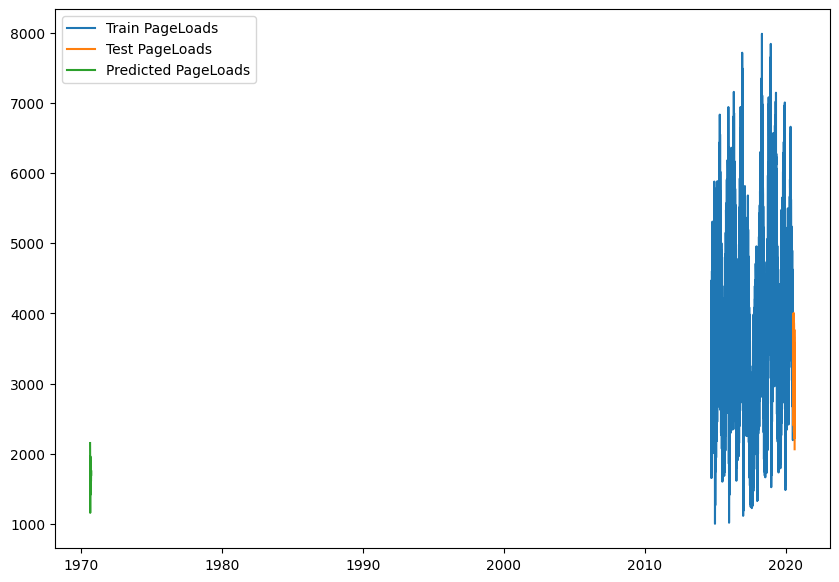

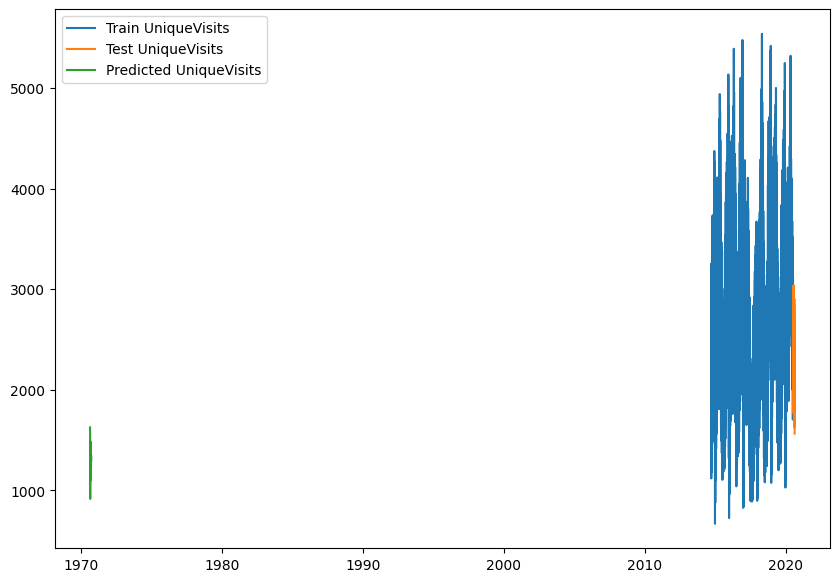

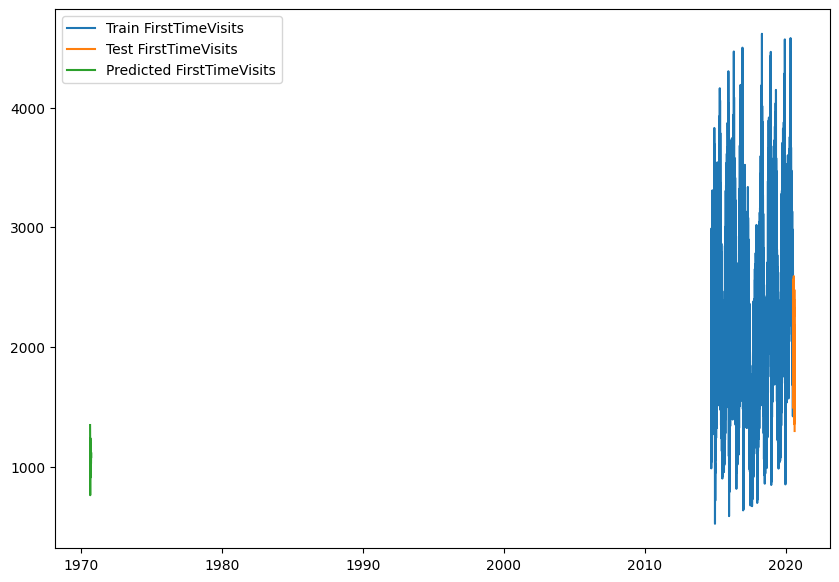

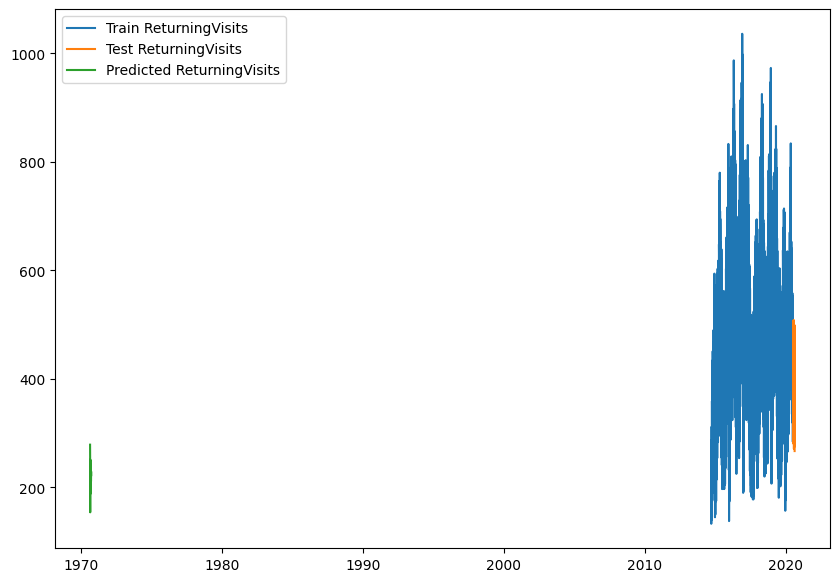

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['PageLoads', 'UniqueVisits','FirstTimeVisits', 'ReturningVisits' ]:

    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

#**Exp8** CNN

In [ ]:
import numpy as np
import pandas as pd
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [ ]:
def split_sequence(sequence,steps):
  X,y=list(),list()
  for start in range(len(sequence)):
    end_index=start+steps
    if end_index > len(sequence)-1:
      break
    sequence_x,sequence_y=sequence[start:end_index],sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X),array(y)

In [ ]:
def exp8 (col_name):
  raw_sequence=df[col_name]
  steps=3
  X,y=split_sequence(raw_sequence,steps)
  print("****************************************************************")
  print('The input sequence on which we will test our CNN Model: ')
  print(raw_sequence)
  print("\n\n\n\n****************************************************************")
  print('The features (X) , lagged values of time series , for our CNN Model')
  print(X[:5])
  print("\n\n\n\n****************************************************************")
  print('The respective observed values (y) of the sequence for training in CNN Model')
  print(y)
  print("****************************************************************\n\n\n\n")
  # Reshape 2D imput data to 3D input data
  features=1
  X=X.reshape((X.shape[0],X.shape[1],features))
  print('After reshaping , the shape of the input X ')
  print(X.shape)
  print("\n\n\n\n*************************************************")
  print("*************************************************")
  print('The final form of input feature matrix X')
  print(X[:5])
  print("\n\n\n\n*************************************************")
  print("*************************************************")
  print('Feature matrix X is ready for input to CNN Model')
  print("*************************************************\n\n\n\n")
  # Defining model architecture
  model=Sequential()
  model.add(Conv1D(filters=64,kernel_size=2,activation='relu',input_shape=(steps,features)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100,activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam',loss='mse')
  # fit model
  model.fit(X,y,epochs=100,verbose=0)
  #predict
  x_input=array(raw_sequence[-steps-1:-1])
  x_input=x_input.reshape((1,steps,features))
  y_pred=model.predict(x_input,verbose=0)
  print("*************************************************")
  print(f"The next predicted value is ")
  print(y_pred)
  print(f"The next true value is ")
  print(raw_sequence.iloc[-1])
  print("*************************************************")

In [ ]:
exp8 ("UniqueVisits")

****************************************************************
The input sequence on which we will test our CNN Model: 
0       447
1       478
2       477
3       349
4       161
       ... 
2188    395
2189    383
2190    242
2191    114
2192    363
Name: UniqueVisits, Length: 2193, dtype: int64




****************************************************************
The features (X) , lagged values of time series , for our CNN Model
[[447 478 477]
 [478 477 349]
 [477 349 161]
 [349 161 198]
 [161 198 234]]




****************************************************************
The respective observed values (y) of the sequence for training in CNN Model
[349 161 198 ... 242 114 363]
****************************************************************




After reshaping , the shape of the input X 
(2190, 3, 1)




*************************************************
*************************************************
The final form of input feature matrix X
[[[447]
  [478]
  [477]]

 [[478]
  [47

In [ ]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(1229, 1259)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(1229, 1259)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

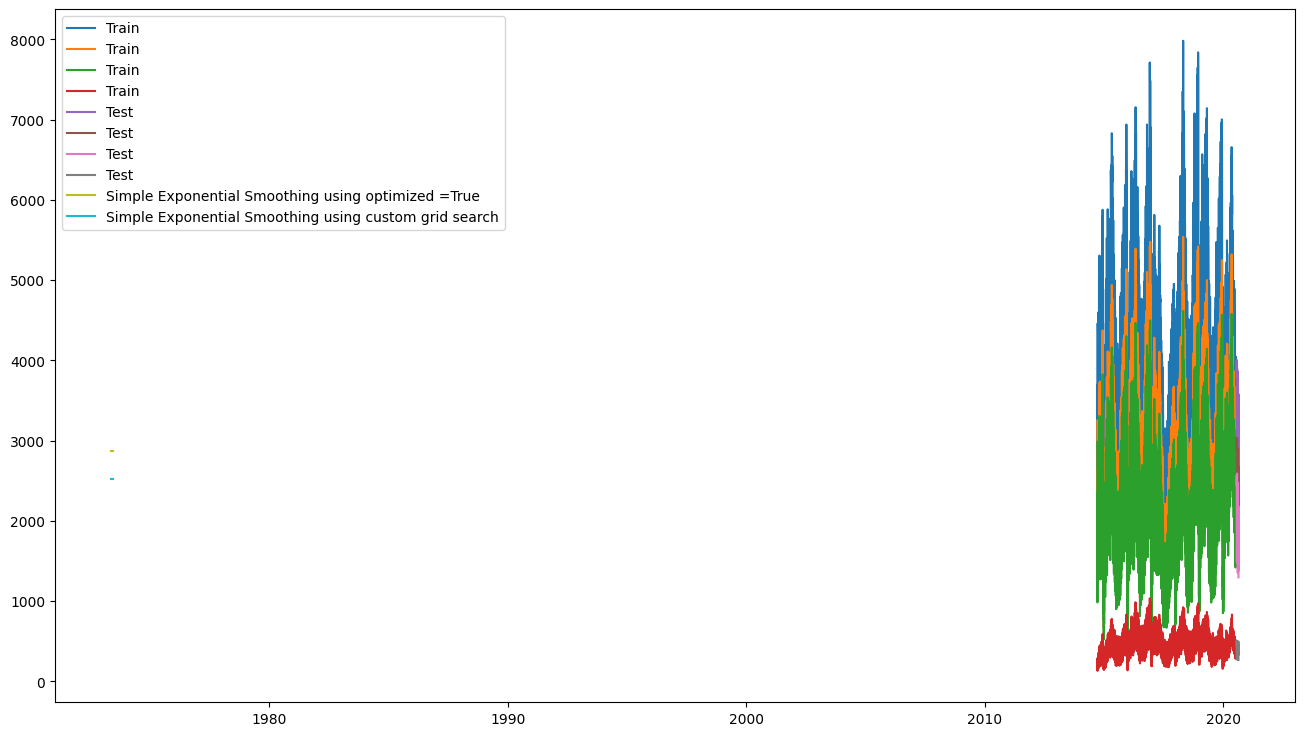

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Simple Exponential Smoothing using optimized =True')
plt.plot(df_fcst_gs_pred, label='Simple Exponential Smoothing using custom grid search')
plt.legend(loc='best')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

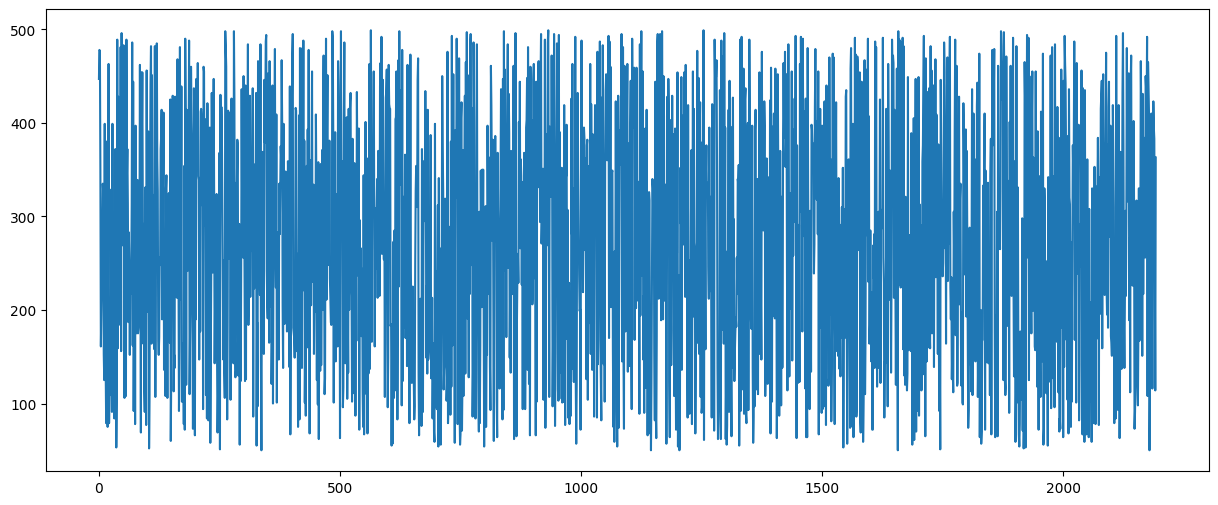

In [ ]:
df['UniqueVisits'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(df, autolag='') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['','','',''])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df,df['UniqueVisits'])

Results of Dickey-Fuller Test for column: 0       447
1       478
2       477
3       349
4       161
       ... 
2188    395
2189    383
2190    242
2191    114
2192    363
Name: UniqueVisits, Length: 2193, dtype: int64


TypeError: ignored

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 11.1 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
model = arch_model(df['UniqueVisits'], vol='Garch', p=1, q=1)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 21120.90091762125
Iteration:      2,   Func. Count:     16,   Neg. LLF: 13777.15336288753
Iteration:      3,   Func. Count:     22,   Neg. LLF: 13777.090995104965
Iteration:      4,   Func. Count:     27,   Neg. LLF: 13777.090992005302
Iteration:      5,   Func. Count:     32,   Neg. LLF: 13777.090984522802
Iteration:      6,   Func. Count:     36,   Neg. LLF: 13777.090984522642
Optimization terminated successfully    (Exit mode 0)
            Current function value: 13777.090984522802
            Iterations: 6
            Function evaluations: 36
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           UniqueVisits   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -13777.1
Distribution:                  Normal   

In [ ]:
from arch import arch_model
model = arch_model(df['UniqueVisits'], vol='Arch', p=1, q=1)
results = model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 13783.490327358584
Iteration:      2,   Func. Count:     10,   Neg. LLF: 13780.484804443173
Iteration:      3,   Func. Count:     14,   Neg. LLF: 13780.484005541291
Iteration:      4,   Func. Count:     18,   Neg. LLF: 13780.483783547585
Iteration:      5,   Func. Count:     22,   Neg. LLF: 13780.483343822343
Iteration:      6,   Func. Count:     26,   Neg. LLF: 13780.48329306078
Iteration:      7,   Func. Count:     30,   Neg. LLF: 13780.48326340425
Iteration:      8,   Func. Count:     34,   Neg. LLF: 13780.483211783698
Iteration:      9,   Func. Count:     38,   Neg. LLF: 13780.483095821235
Iteration:     10,   Func. Count:     42,   Neg. LLF: 13780.482695031249
Iteration:     11,   Func. Count:     46,   Neg. LLF: 13780.48171985622
Iteration:     12,   Func. Count:     50,   Neg. LLF: 13780.47887430831
Iteration:     13,   Func. Count:     54,   Neg. LLF: 13780.473984372711
Iteration:     14,   Func. Count:     58,   Neg. LLF: 1